# Matrix Factorization (Phân rã ma trận)

- Ý tưởng: phân tách ma trận rating ban đầu thành 2 (hoặc nhiều hơn) ma trận (có số chiều nhỏ hơn) và khi nhân các ma trận này lại với nhau ta có được ma trận xấp xỉ ban đầu.

### Về mặt toán học
- $R$: ma trận rating user-item có kích thước $m \times n$ ($m$ users và $n$ items)
- $k$: số biến ẩn

Mục tiêu: tìm hai ma trận nhân tố ẩn $U$ ($m \times k$) và $V$ ($n \times k$) sao cho
$$R \approx U \times V^T = \hat R$$

Ví dụ:



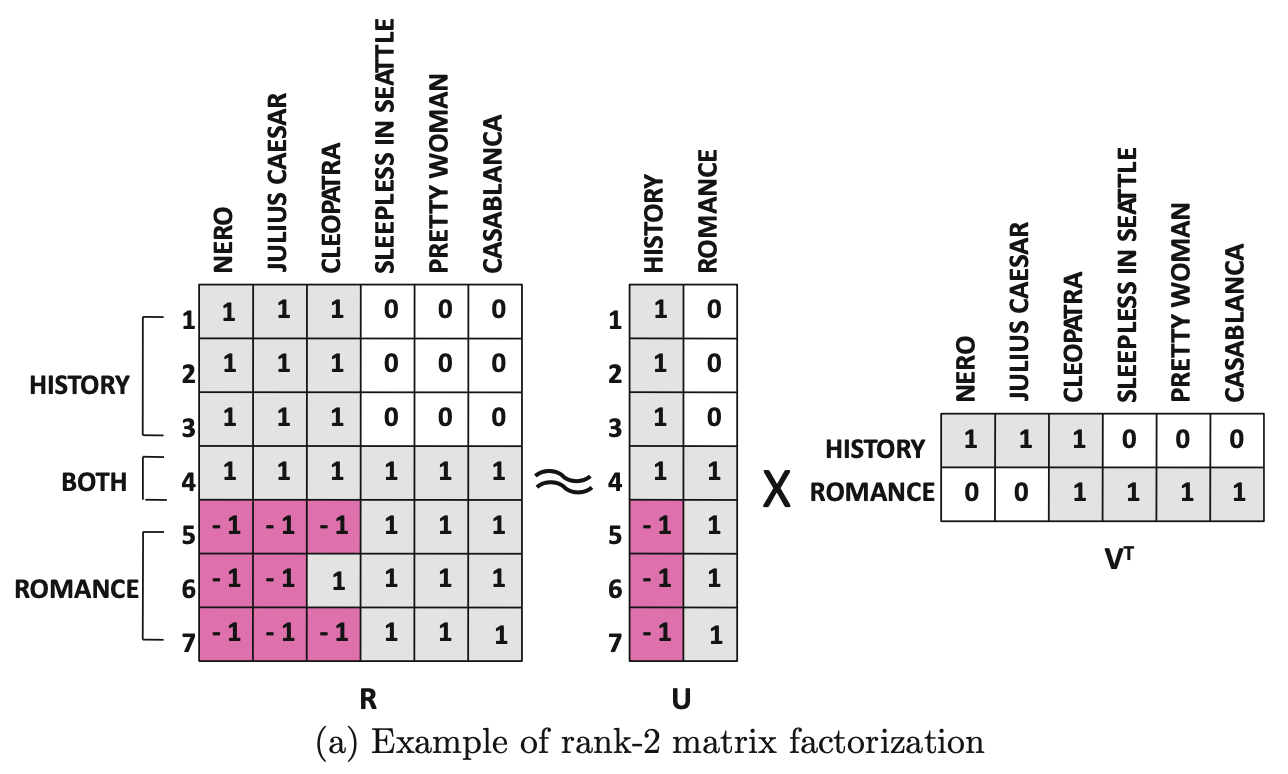

Khi tìm được 2 ma trận nhân tử $U$ và $V$ ta có thể ước lượng rating của user i với item j như sau:
$$\hat r_{ij} = \sum_{s=1}^{k} u_{is} \cdot v_{js} $$

Ví dụ: $\hat r_{11} = u_{11} \cdot v_{11} + u_{12} \cdot v_{21} = 1 \cdot 1 + 0 \cdot 0 = 1$
$\hat r_{51} = u_{51} \cdot v_{11} + u_{52} \cdot v_{21} = -1 \cdot 1 + 1 \cdot 0 = -1$

Như vậy, ta có ma trận $\hat R$ như sau:

UserID|NERO|JULIUS..|CLEAOPATRA|SLEEPLESS..|PRETTY..|CASANBLANCA|
-|:-:|:-:|:-:|:-:|:-:|:-:|
1|1|1|1|0|0|0|
2|1|1|1|0|0|0|
3|1|1|1|0|0|0|
4|1|1|2|1|1|1|
5|-1|-1|0|1|1|1|
6|-1|-1|0|1|1|1|
7|-1|-1|0|1|1|1|

Ma trận phần dư (residuals) = $R - \hat R$

UserID|NERO|JULIUS..|CLEAOPATRA|SLEEPLESS..|PRETTY..|CASANBLANCA|
-|:-:|:-:|:-:|:-:|:-:|:-:|
1|0|0|0|0|0|0|
2|0|0|0|0|0|0|
3|0|0|0|0|0|0|
4|0|0|-1|0|0|0|
5|0|0|-1|0|0|0|
6|0|0|1|0|0|0|
7|0|0|-1|0|0|0|

Ta mong muốn tổng sai số bình phương nhỏ nhất có thể, nghĩa là cần tìm $U$ và $V$ để cực tiểu hóa hàm mất mát:

Minimize $J = \frac{1}{2} \|R - \hat R\|^2 = \frac{1}{2} \|R - UV^T\|^2$

--> Sử dụng Gradient Descent

GD là thuật toán giúp tìm các điểm cực tiểu của hàm số bằng cách đi ngược chiều với chiều của gradient vector của hàm số đó. (gradient vector là vector chứa đạo hàm riêng của hàm số và đặc trưng là luôn chỉ về hướng tăng của hàm số)



### Các bước thực hiện thuật toán

- Mục tiêu: tìm hai ma trận nhân tố ẩn $U$ ($m \times k$) và $V$ ($n \times k$) sao cho
$$R \approx U \times V^T = \hat R$$

Tìm ra các nhân tố ẩn để xác định cách user đánh giá 1 item. Ví dụ: 2 user thích 1 bộ phim có thể do họ đều thích diễn viên trong phim hoặc cả 2 đều thích thể loại phim đó thì các biến ẩn ở đây là diễn viên hoặc thể loại phim.

- Ma trận rating không đầy đủ nên ta chỉ sử dụng tập $S = \{(i,j): r_{ij} \text{ quan sát được}\}$

Nếu ta có thể phân tách ma trận $R \sim U \cdot V^T$ bằng các rating quan sát được thì ta có thể dự đoán được các giá trị bị khuyết trong ma trận $R$ ban đầu bằng hai ma trận nhân tử $U$ và $V$ ($U = [u_{is}]_{m \times k}, V = [v_{js}]_{n \times k}$ là các ma trận đầy đủ).
- Rating dự đoán cho vị trí (i,j) là:
$$\hat r_{ij} = \sum_{s=1}^k u_{is} \cdot v_{js}$$
- Sai số tại vị trí (i,j):
$$e_{ij} = (r_{ij} - \hat r_{ij}) = (r_{ij} - \sum_{s=1}^k u_{is} \cdot v_{js})$$
- Hàm mất mát:
$$J = \frac{1}{2} \sum_{(i,j) \in S} e_{ij}^2 = \frac{1}{2} \sum_{(i,j) \in S} \left(r_{ij} - \sum_{s=1}^k u_{is}\cdot v_{js}\right)^2$$
- Sử dụng Gradient Descent để cực tiểu hóa hàm mất mát $J$
  - Đạo hàm riêng từng phần, $\forall q \in \{1... k\}$:
  $$\frac{\partial J}{\partial u_{iq}} = \sum_{j:(i,j) \in S} (r_{ij} - \sum_{s=1}^k u_{is}\cdot v_{js}) (-v_{jq}) = \sum_{j:(i,j) \in S} e_{ij} \cdot (-v_{jq})$$

  $$\frac{\partial J}{\partial v_{jq}} = \sum_{i:(i,j) \in S} (r_{ij} - \sum_{s=1}^k u_{is}\cdot v_{js}) (-u_{iq}) = \sum_{i:(i,j) \in S} e_{ij} \cdot (-u_{iq})$$

  - Cập nhật $u_{iq}$ và $v_{jq}$:
  $$u_{iq} \Leftarrow u_{iq} - \alpha \cdot \left[\frac{\partial J}{\partial u_{iq}}\right] = u_{iq} + \alpha \cdot \sum_{j:(i,j) \in S} e_{ij} \cdot v_{jq}$$
  $$v_{jq} \Leftarrow v_{jq} - \alpha \cdot \left[\frac{\partial J}{\partial v_{jq}}\right] = v_{jq} + \alpha \cdot \sum_{i:(i,j) \in S} e_{ij} \cdot u_{iq}$$
  $\alpha$ là cỡ bước (learning_rate).

### Regularization

Để tránh overfitting bằng cách làm giảm độ lớn của các hệ số trong $U$ và $V$.

- Hàm mất mát:
\begin{equation}
\begin{aligned}
J &= \frac{1}{2} \sum_{(i,j) \in S} e_{ij}^2 + \frac{\lambda}{2} (\|U\|^2 + \|V\|^2) \\
&= \frac{1}{2} \sum_{(i,j) \in S} \left(r_{ij} - \sum_{s=1}^k u_{is}\cdot v_{js}\right)^2 + \frac{\lambda}{2} \sum_{i=1}^m \sum_{s=1}^k u_{is}^2 + \frac{\lambda}{2} \sum_{j=1}^n \sum_{s=1}^k v_{js}^2
\end{aligned}
\end{equation}
$\lambda$ là tham số hiệu chỉnh.
- Sử dụng Gradient Descent để cực tiểu hóa hàm mất mát $J$
  - Đạo hàm riêng từng phần, $\forall q \in \{1... k\}$:
  $$\frac{\partial J}{\partial u_{iq}} = \sum_{j:(i,j) \in S} e_{ij} \cdot (-v_{jq}) + \lambda u_{iq}$$

  $$\frac{\partial J}{\partial v_{jq}} = \sum_{i:(i,j) \in S} e_{ij} \cdot (-u_{iq}) + \lambda v_{jq}$$

  - Cập nhật $u_{iq}$ và $v_{jq}$:
  $$u_{iq} \Leftarrow u_{iq} + \alpha \left( \sum_{j:(i,j) \in S} e_{ij} \cdot v_{jq} -\lambda \cdot u_{iq} \right)$$
  $$v_{jq} \Leftarrow v_{jq} + \alpha \left( \sum_{i:(i,j) \in S} e_{ij} \cdot u_{iq} - \lambda v_{jq} \right).$$


### Kết hợp Biases của user và item

Trong thực tế, user có cách đánh giá item không giống nhau, hay item được nhiều nguời yêu thích có xu hướng nhận được các đánh giá tích cực hơn. Do đó, khi dự đoán rating, ta cũng có thể thêm các bias này vào để có kết quả chính xác hơn:
- Rating dự đoán cho vị trí (i,j) là:
$$\hat r_{ij} = o_i + p_j + \sum_{s=1}^k u_{is} \cdot v_{js}$$

- Sai số tại vị trí (i,j):
$$e_{ij} = (r_{ij} - \hat r_{ij}) = (r_{ij} - o_i - p_j - \sum_{s=1}^k u_{is} \cdot v_{js})$$
$o_i, p_j$ cũng là các biến cần được học trong quá trình training.

- Hàm loss:
\begin{equation}
\begin{aligned}
J &= \frac{1}{2} \sum_{(i,j) \in S} e_{ij}^2 + \frac{\lambda}{2} \sum_{i=1}^m \sum_{s=1}^k u_{is}^2 + \frac{\lambda}{2} \sum_{j=1}^n \sum_{s=1}^k v_{js}^2 + \frac{\lambda}{2} \sum_{i=1}^m o_i^2 + \frac{\lambda}{2} \sum_{j=1}^n p_j^2
\end{aligned}
\end{equation}

- Đạo hàm riêng từng phần (tương tự như trên)
- Cập nhật $u_{iq}, v_{jq}, o_i, p_j$:

  $$u_{iq} \Leftarrow u_{iq} + \alpha \left( \sum_{j:(i,j) \in S} e_{ij} \cdot v_{jq} -\lambda \cdot u_{iq} \right)$$
  $$v_{jq} \Leftarrow v_{jq} + \alpha \left( \sum_{i:(i,j) \in S} e_{ij} \cdot u_{iq} - \lambda v_{jq} \right).$$
  $$o_i \Leftarrow o_i + \alpha (\sum_{j:(i,j) \in S} e_{ij}  - \lambda \cdot o_i)$$
  $$p_j \Leftarrow p_j + \alpha (\sum_{i:(i,j) \in S} e_{ij}  - \lambda \cdot p_j)$$




### Căn bậc hai trung bình bình phương sai số (RMSE - Root Mean Squared Error)

$$\text{RMSE} = \sqrt{\frac{\sum_{(i,j)\in S} e_{ij}^2}{|S|}}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class MatrixFactorization():

  def __init__(self, data, k, alpha, lam, max_iters=100):
    """
    @params
      - data: dataframe với dòng~user, cột~item, value ~ rating
      - K: số chiều của nhân tố ẩn, cho cả U và V
      - alpha : cỡ bước
      - lam : tham số hiệu chỉnh
      - max_iters: số vòng lặp
    """
    self.data = data
    self.R = self.data.to_numpy()
    self.m, self.n = self.data.shape
    self.k = k
    self.max_iters = max_iters
    # Khởi tạo các ma trận nhân tố ẩn U(m x k) và V(n x k)
    self.U = np.random.randn(self.m, k)
    self.V = np.random.randn(self.n, k)

    # Khởi tạo các siêu tham số (hyperparameter)
    self.alpha = alpha
    self.lam = lam

  def sgd(self):
    """
    Hàm Stochastic Gradient Descent để cập nhật bias và ma trận nhân tố ẩn U, V
    """
    for i, j, r in self.S:
      # Ước lượng rating
      prediction = self.get_rating(i, j)
      # Tính sai số
      e = (r - prediction)

      # Cập nhật biases
      self.b_user[i] += self.alpha * (e - self.lam * self.b_user[i])
      self.b_item[j] += self.alpha * (e - self.lam * self.b_item[j])

      # Tạo ma trận U, V trung gian
      U_i = self.U[i, :][:]
      V_i = self.V[j, :][:]

      # Cập nhật ma trận U và V
      self.U[i, :] += self.alpha * (e * V_i - self.lam * U_i)
      self.V[j, :] += self.alpha * (e * U_i - self.lam * V_i)

  def get_rating(self, i, j):
    """
    Dự đoán rating của user i đối với item j
    """
    prediction =  self.b_user[i] + self.b_item[j] + self.U[i, :].dot(self.V[j, :].T)
    if prediction < 1:
      prediction = 1
    if prediction > 5:
      prediction = 5
    return prediction

  def full_matrix(self):
    """
      Cập nhật ma trận đầy đủ sử dụng các bias, ma trận nhân tố ẩn U và V
    """
    predicted_R = self.b_user[:,np.newaxis] + self.b_item[np.newaxis:,] + self.U.dot(self.V.T)
    predicted_R[predicted_R > 5 ] = 5
    predicted_R[predicted_R < 1 ] = 1
    return predicted_R

  def rmse(self):
    """
      Hàm tính căn bậc hai trung bình bình phương sai số (RMSE)
    """
    # Lấy các vị trí mà r_ij != nan
    notnan_indices = np.argwhere(~np.isnan(self.R))
    # Ma trận rating dự đoán
    predicted = self.full_matrix()
    # Khởi tạo sai số = 0
    error = 0
    # Lặp qua những vị trí mà ma trận R không bị khuyết và tính tổng sai số
    for indx in notnan_indices:
      error += pow(self.R[indx[0], indx[1]] - predicted[indx[0], indx[1]], 2)
    return np.sqrt(error/len(notnan_indices))

  def loss(self):
    return (self.rmse()**2 + self.lam*(np.sum(self.U**2) + np.sum(self.V**2) +
                                       np.sum(self.b_user**2) + np.sum(self.b_item**2)))/2

  def train(self):

    # Khởi tạo biases
    self.b_user = np.zeros(self.m) # bias đối với users
    self.b_item = np.zeros(self.n) # bias đối với item

    # Tạo tập S = [(i,j,r_ij): r_ij != nan]
    self.S = [
        (i, j, self.R[i, j])
        for i in range(self.m)
        for j in range(self.n)
        if not np.isnan(self.R[i, j])
    ]

    # Áp dụng phương pháp Gradient Descent để tối ưu hàm loss
    training_process = []

    for iter in range(self.max_iters):
      np.random.shuffle(self.S)

      # Tính sai số rmse
      error = self.rmse()
      # Hàm loss
      loss = self.loss()

      # Cập nhật U và V
      self.sgd()
      # Lưu lần lặp và sai số tương ứng
      training_process.append((iter, loss, error))
      if (iter+1) % 10 == 0:
        print(f"Vòng lặp: {iter+1} ; loss = {loss};  rmse = {error}")

    return training_process

  def pred_for_users(self, target_user):
    """Dự đoán rating cho các item mà user mục tiêu chưa đánh giá"""
    pred_df = pd.DataFrame(self.full_matrix(), index=self.data.index, columns=self.data.columns)
    item_rated_by_user = self.data[self.data.index==target_user].dropna(axis=1).columns
    item_unrated_by_user = self.data.drop(item_rated_by_user, axis=1, errors='ignore').columns
    return (pred_df[pred_df.index==target_user][item_unrated_by_user].T
            .rename(columns={'User':'Item', target_user: 'pred_rating'})
            .sort_values('pred_rating', ascending=False).round(2))


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Thay đổi đương dẫn
import os
os.chdir("drive/My Drive/KHTN/RecSys/data")

# Print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/KHTN/RecSys/data


In [ ]:
# Load the dataset
data = pd.read_excel('data_02.xlsx')
data = data.set_index('User')
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),1259: Stand by Me (1986),2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
User,,,,,,,,,,,,,,,,,,,,
755,2.0,5.0,2.0,NaN,4.0,4.0,1.0,2.0,NaN,3.0,2.0,NaN,5.0,2.0,5.0,4.0,2.0,5.0,NaN,NaN
5277,1.0,NaN,NaN,2.0,4.0,2.0,5.0,NaN,NaN,4.0,3.0,2.0,2.0,NaN,2.0,NaN,5.0,1.0,3.0,NaN
1577,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0
4388,2.0,3.0,NaN,NaN,NaN,1.0,NaN,3.0,4.0,NaN,NaN,4.0,NaN,3.0,5.0,NaN,5.0,1.0,1.0,2.0
1202,NaN,3.0,4.0,1.0,4.0,1.0,4.0,4.0,NaN,1.0,5.0,1.0,NaN,4.0,NaN,3.0,5.0,5.0,NaN,NaN


In [ ]:
mf = MatrixFactorization(data, k=10, alpha=0.015, lam=0.01, max_iters=300)
training_process = mf.train()

Vòng lặp: 10 ; loss = 1.9790441563076904;  rmse = 0.7534570419496147
Vòng lặp: 20 ; loss = 1.8278679259008472;  rmse = 0.4903454193124517
Vòng lặp: 30 ; loss = 1.7929665705277968;  rmse = 0.37119213284469094
Vòng lặp: 40 ; loss = 1.775055354764927;  rmse = 0.2981318955574089
Vòng lặp: 50 ; loss = 1.7547235364776668;  rmse = 0.24852110128642135
Vòng lặp: 60 ; loss = 1.7332226021307608;  rmse = 0.2108295114131448
Vòng lặp: 70 ; loss = 1.712162139684857;  rmse = 0.17957916112007685
Vòng lặp: 80 ; loss = 1.690902418324832;  rmse = 0.15285635923975915
Vòng lặp: 90 ; loss = 1.6689233816692661;  rmse = 0.13017088948354655
Vòng lặp: 100 ; loss = 1.6470156524040962;  rmse = 0.11099661232077355
Vòng lặp: 110 ; loss = 1.6260362560996287;  rmse = 0.09531283740243392
Vòng lặp: 120 ; loss = 1.604649956497308;  rmse = 0.08283023423960939
Vòng lặp: 130 ; loss = 1.5838221519978852;  rmse = 0.0728280180163542
Vòng lặp: 140 ; loss = 1.56322285122381;  rmse = 0.06504541851346497
Vòng lặp: 150 ; loss = 1.5

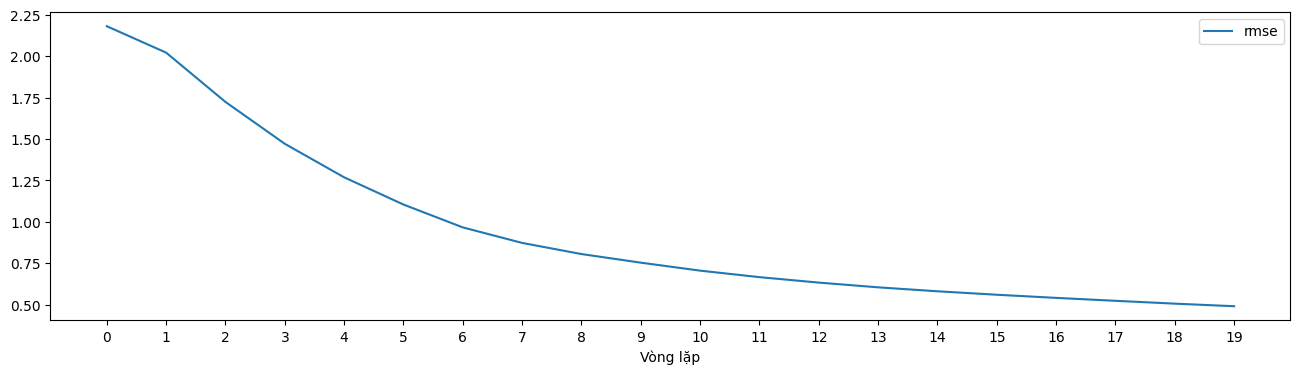

In [ ]:
x = [x for x, y, z in training_process][:20]
y = [y for x, y, z in training_process][:20]
z = [z for x, y, z in training_process][:20]

plt.figure(figsize=((16,4)))
plt.plot(x, z, label='rmse')
plt.xticks(x, x)
plt.xlabel("Vòng lặp")
plt.legend()

In [ ]:
target_user = 4388
print(f"Dự đoán rating cho các item mà user {target_user} chưa đánh giá: \n")
(mf.pred_for_users(target_user))

Dự đoán rating cho các item mà user 4388 chưa đánh giá: 



User,pred_rating
260: Star Wars: Episode IV - A New Hope (1977),5.00
"318: Shawshank Redemption, The (1994)",4.05
"2571: Matrix, The (1999)",2.66
"593: Silence of the Lambs, The (1991)",1.88
356: Forrest Gump (1994),1.00
1259: Stand by Me (1986),1.00
2396: Shakespeare in Love (1998),1.00
780: Independence Day (ID4) (1996),1.00


# Bài tập:

Sử dụng tập dữ liệu sau:

https://drive.google.com/file/d/1xsF56AR0e9zYOaQbWCY-F_VKCbOKs85w/view?usp=drive_link

Đây là tập dữ liệu FilmTrust, được cào từ toàn bộ trang web FilmTrust vào tháng 6 năm 2011, gồm có 3 biến: userID, movieID và rating. Thang điểm đánh giá movie là từ 0.5 đến 4.

- Yêu cầu:
  - Sử dụng random search, grid search hoặc bất kỳ cách nào để chọn bộ siêu tham số phù hợp.
  - Viết thêm hàm xét điều kiện dừng của thuật toán matrix factorization.
  - Chọn ra 10 items có điểm rating dự đoán cao nhất cho user 123.


In [ ]:
df = pd.read_csv("ratings.txt", sep=" ", header=None,
                 names=["userID", "movieID", "rating"])
df = df.drop_duplicates(subset=["userID", "movieID"])

In [ ]:
ratings_mx = df.pivot(index="userID", columns="movieID", values="rating")
ratings_mx.shape

(1508, 2071)

In [ ]:
ratings_mx.head()

movieID,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
userID,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,3.5,3.0,4.0,3.5,3.5,3.0,2.5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.unique(ratings_mx)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , nan])